## 과대적합 (OverFitting)

<img src="https://velog.velcdn.com/images/newnew_daddy/post/2a53f13f-9a04-48cb-96dd-1ecc8f1bafc1/image.png" width="50%">

#### 1. 개념
- 모델이 학습 데이터에 지나치게 맞추어져서 새로운 데이터에 대한 일반화 성능이 떨어지는 현상
- 모델이 훈련 데이터의 잡음(noise)까지 학습하여 복잡한 패턴을 과도하게 모델링할 때 발생

#### 2. 특징
- 학습 데이터에 대한 성능은 매우 좋지만, 테스트 데이터에 대한 성능은 낮다.
- 모델이 복잡할수록 (예: 너무 많은 파라미터를 가진 경우) 과대적합이 발생할 가능성이 높음.

#### 3. 문제점
- 모델이 새로운 데이터에 대해 잘 일반화하지 못하기 때문에 실제 사용 시 성능이 떨어집니다.

#### 4. 해결 방법
- **교차 검증(Cross-validation)**: 데이터를 여러 부분으로 나누어 교차 검증을 통해 모델의 성능을 평가하고, 과대적합을 방지
- **정규화(Regularization)**: L1, L2 정규화를 사용하여 모델의 복잡도를 줄이고 과대적합을 방지
- **모델 단순화**: 모델의 복잡도를 줄이는 방향으로 설계

#### 과대적합 모델 실습

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./dataset/overfitting.csv')

df.head()

,X,Y
0,-0.752759,2.269031
1,2.704286,8.532235
2,1.391964,4.245097
3,0.591951,2.466050
4,-2.063888,0.587407


In [26]:
X = df['X'].values
y = df['Y'].values

X.shape, y.shape

((50,), (50,))

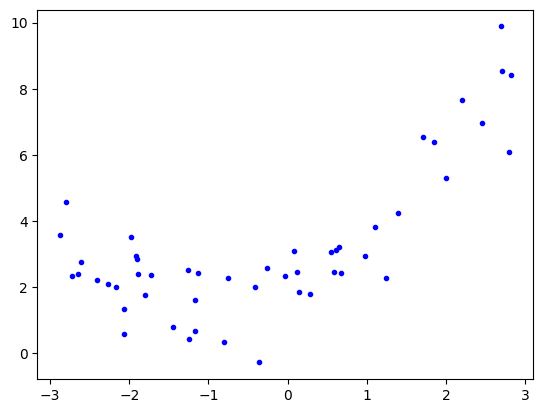

In [27]:
# 시각화
plt.plot(X, y, "b.")
plt.show()

In [28]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35,), (15,), (35,), (15,))

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10) # include_bias -> 0차항 출력 여부
train_poly = poly.fit_transform(X_train.reshape(-1,1))

## 차수 확인
print(poly.get_feature_names_out())

print(X[0])

print(train_poly[0])

['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
-0.752759286915825
[ 1.00000000e+00 -2.65149833e+00  7.03044338e+00 -1.86412089e+01
  4.94271341e+01 -1.31055963e+02  3.47494668e+02 -9.21381530e+02
  2.44304158e+03 -6.47772067e+03  1.71756655e+04]


In [30]:
test_poly = poly.transform(X_test.reshape(-1,1))

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [33]:
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.8981970616377484
0.5416413108272082


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10) # include_bias -> 0차항 출력 여부
X_poly = poly.fit_transform(X.reshape(-1,1))

## 차수 확인
print(poly.get_feature_names_out())

print(X[0])

print(X_poly[0])

['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
-0.752759286915825
[ 1.         -0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022
  0.18194358 -0.13695972  0.1030977  -0.07760775  0.05841996]


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [8]:
## -3 ~ 3 구간까지 100개의 간격으로 나눔
xx = np.linspace(-3, 3, 100)
## 도출된 다항회귀 식에 맞게 데이터를 transform 하기 위해 배열 형태 변경
xx = xx.reshape(100, 1)

xx_poly = poly.transform(xx)

y_pred = lr.predict(xx_poly)

In [ ]:
lr.score()

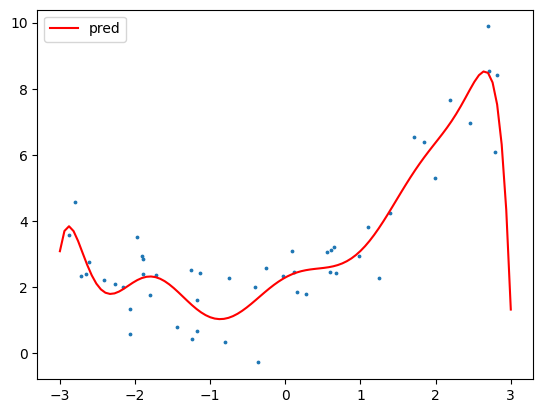

In [7]:
plt.scatter(X, y, s=3)
plt.plot(xx, y_pred, 'r-', label = 'pred')
plt.legend()
plt.show()

## 과소적합 (Underfitting)

<img src="https://velog.velcdn.com/images/newnew_daddy/post/b16a8950-589a-4edb-96d4-7a8e60da652e/image.png" width="50%">

#### 1. 개념
- 모델이 너무 단순해서 학습 데이터를 제대로 대변하지 못하는 경우
- 모델이 학습 데이터의 패턴을 충분히 학습하지 못해 성능이 떨어지는 현상
- 모델이 너무 단순하여 데이터의 복잡한 구조를 캡처하지 못하는 경우 발생

#### 2. 특징
- 학습 데이터와 테스트 데이터 모두에서 성능이 저조
- 모델이 너무 단순하거나 중요한 피처를 사용하지 못할 때 발생
- 훈련 손실과 검증 손실이 모두 높은 경우

#### 3. 문제점
- 모델이 학습 데이터의 패턴을 제대로 학습하지 못하므로, 예측 성능이 매우 낮음
- 모든 데이터에 대해 모델의 성능이 낮으므로 사용성이 떨어짐.

#### 4. 해결 방법
- **모델 복잡도 증가**: 모델을 더 복잡하게 만들어 데이터를 더 잘 학습하도록 합니다. 예를 들어, 더 많은 피처를 추가하거나 더 복잡한 알고리즘을 사용합니다.
- **더 많은 데이터 수집**: 더 많은 학습 데이터를 사용하여 모델의 성능을 일반화
- **다른 알고리즘 사용**: 단순한 모델 대신 더 복잡하고 강력한 알고리즘을 사용합니다.

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X.reshape(-1,1))

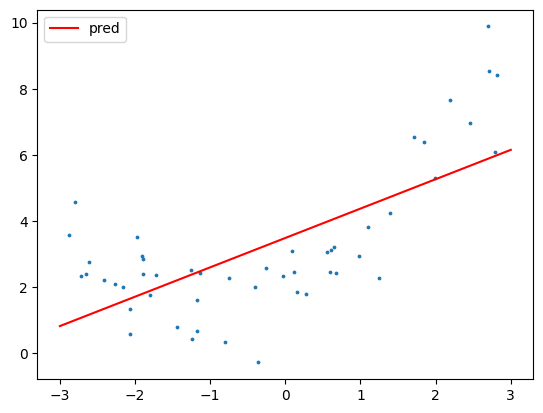

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_poly, y)

## -3 ~ 3 구간까지 100개의 간격으로 나눔
xx = np.linspace(-3, 3, 100)
## 도출된 다항회귀 식에 맞게 데이터를 transform 하기 위해 배열 형태 변경
xx = xx.reshape(100, 1)

xx_poly = poly.transform(xx)

y_pred = lr.predict(xx_poly)

plt.scatter(X, y, s=3)
plt.plot(xx, y_pred, 'r-', label = 'pred')
plt.legend()
plt.show()